In [1]:
import GetData as gd
data_dir = "./Data/"
objGetData = gd.GetData(252, 40, data_dir)
pureReturns = objGetData.GetPureReturns()
dfTable = objGetData.GetNewDF()
nticker = objGetData.GetNIndex()

In [2]:
import DefineS
objDefineS = DefineS.DefineS(dfTable, 8, 92, 252, 252)
spe_index = objDefineS.GetIrr()
norm_index = objDefineS.GetNorm()
all_index = objDefineS.GetAll()
prob_pair = objDefineS.GetProbPair()
prob_T = DefineS.GetProbTable(prob_pair, pureReturns, 252)

In [84]:
import importlib
import GenDic
importlib.reload(GenDic)
objGenDic = GenDic.GenDic("MG", all_index, pureReturns, 252, nticker)

In [79]:
#this columns reads generated scenerios by GAN method and construct the dictionary
import numpy as np
loaded_ret = np.loadtxt("ML_Result_2.txt")
load_original_ret = loaded_ret.reshape(loaded_ret.shape[0], loaded_ret.shape[1] // 9, 9)
import pandas as pd
keys = list(pureReturns.index)
col = pureReturns.columns
whole_dic = {}
for i in range(len(load_original_ret)):
    temp_data = load_original_ret[i]
    temp_index = keys[i: i+252]
    temp_key = str(keys[i+126])
    whole_dic[temp_key] = pd.DataFrame(temp_data, index = temp_index, columns = pureReturns.columns)
ML_Gen_dic = {}
for index in all_index:
    ML_Gen_dic[str(index)] =  whole_dic[str(index)]

In [51]:
whole_hist_dic = {}
for i in range(len(load_original_ret)):
    temp_data = pureReturns.iloc[i:i+252, : ]
    temp_index = keys[i: i+252]
    temp_key = str(keys[i+126])
    whole_hist_dic[temp_key] = pd.DataFrame(temp_data, index = temp_index, columns = pureReturns.columns)


In [75]:
hist_dic = objGenDic.GetHistDic()
#hist_dic = whole_hist_dic
hist_dic_syn = objGenDic.GetSynGenDic()
#hist_dic_syn = GenDic.syn_dic(hist_dic)
print('Done')

Done


In [80]:
gen_dic = ML_Gen_dic
#gen_dic = whole_dic
key_list = gen_dic.keys()
for key in key_list:
    gen_dic[key] = gen_dic[key]
gen_dic_syn = GenDic.syn_dic(gen_dic)
#gen_dic_syn = GenDic.syn_dic(gen_dic)
print('Done')
       

Done


In [83]:

print(whole_dic["1992-06-03"].head())

print(whole_dic["1992-06-04"].head())

            S5INDU_Return  S5MATR_Return  S5COND_Return  S5FINL_Return  \
1991-12-03       0.009369       0.011698       0.008867       0.014288   
1991-12-04       0.005143       0.006551       0.005726       0.006028   
1991-12-05       0.004506       0.005021       0.005475       0.003365   
1991-12-06      -0.001620      -0.001894      -0.000710      -0.003839   
1991-12-09      -0.001757      -0.002363      -0.001081      -0.002972   

            S5INFT_Return  S5ENRS_Return  S5TELS_Return  S5HLTH_Return  \
1991-12-03       0.011202       0.004559       0.008397       0.007957   
1991-12-04       0.007180       0.004920       0.004437       0.004828   
1991-12-05       0.005611       0.003502       0.003921       0.003557   
1991-12-06      -0.002375      -0.001409      -0.001963      -0.001704   
1991-12-09      -0.002044      -0.001505      -0.001502      -0.001564   

            S5UTIL_Return  
1991-12-03       0.007870  
1991-12-04       0.005893  
1991-12-05       0.005031 

In [18]:
import Evaluation
importlib.reload(Evaluation)
objEva = Evaluation.Evaluation(hist_dic, gen_dic)

In [19]:
AvgDiff = objEva.GetAvgDiff()
StdDiff = objEva.GetStdDiff()
AvgCorrDiff = objEva.GetAveCorrDiff()
StdCorrDiff = objEva.GetStdCorrDiff()

#AvgDiff
#StdDiff
AvgCorrDiff
#StdCorrDiff

0.366464

In [20]:
print(objEva.GetMDTestTable(0.95))
print(objEva.GetMDTestTable(0.99))
print(objEva.GetMDTestTable(0.999))


Computing signatures of population 1:   0%|          | 0/100 [00:00<?, ?it/s]

   Number of T  Number of F
0            0            9


Computing signatures of population 1:   0%|          | 0/100 [00:00<?, ?it/s]

   Number of T  Number of F
0            3            6


Computing signatures of population 2: 100%|██████████| 100/100 [00:00<00:00, 1012.84it/s]


   Number of T  Number of F
0            6            3


In [22]:
objEva.GetKSTestTable()

,S5INDU_Return,S5MATR_Return,S5COND_Return,S5FINL_Return,S5INFT_Return,S5ENRS_Return,S5TELS_Return,S5HLTH_Return,S5UTIL_Return,Stats
Ave Test Stats,0.125873,0.125873,0.125873,0.125873,0.125873,0.125873,0.125873,0.125873,0.125873,0.125873


In [81]:
objEva2 = Evaluation.Evaluation(hist_dic_syn, gen_dic_syn)

In [66]:
AvgDiffSyn = objEva2.GetAvgDiff()
StdDiffSyn = objEva2.GetStdDiff()
AvgDiffSyn
#StdDiffSyn

,Stats,Synthetic
Mean Diff of Mean,-1.323861,-1.323861
Mean Diff of Var,2.469984,2.469984
Mean Diff of Skew,-20.970342,-20.970342
Mean Diff of Kurt,5.270154,5.270154
Mean Diff of Min,0.142150,0.142150
Mean Diff of Max,0.043140,0.043140


In [25]:
print(objEva2.GetMDTestTable(0.99))
print(objEva2.GetMDTestTable(0.9999))
print(objEva2.GetMDTestTable(0.999999))

 74%|███████▍  | 74/100 [00:00<00:00, 683.26it/s]

   Number of T  Number of F
0            0            1


  0%|          | 0/100 [00:00<?, ?it/s]

   Number of T  Number of F
0            1            0


Computing signatures of population 2: 100%|██████████| 100/100 [00:00<00:00, 605.10it/s]


   Number of T  Number of F
0            1            0


In [26]:
objEva2.GetKSTestTable()

,Synthetic,Stats
Ave Test Stats,0.180119,0.180119


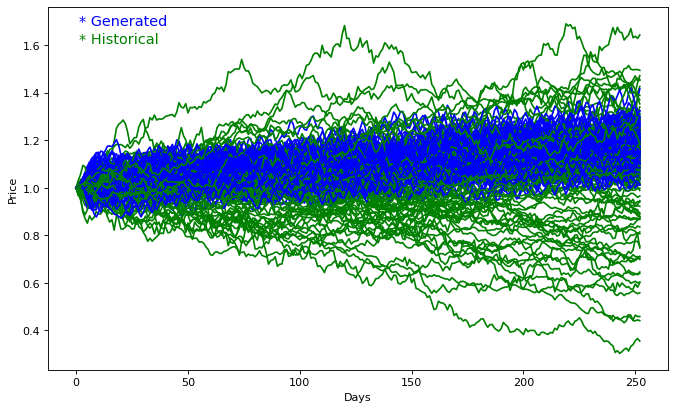

In [82]:
objEva2.SynScenerioPlot()